## Preprocessing

In [157]:
# Import our dependencies
# !pip install seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np


# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [158]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [159]:
# Determine the number of unique values in each column.
print(application_df.nunique().to_string())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2


In [160]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
print(application_df["APPLICATION_TYPE"].value_counts())

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [161]:
# Get summary statistics
ask_amt_stats = application_df["ASK_AMT"].describe()
print(ask_amt_stats)

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64


In [162]:
application_df["ASK_AMT_LOG"] = np.log1p(application_df["ASK_AMT"])

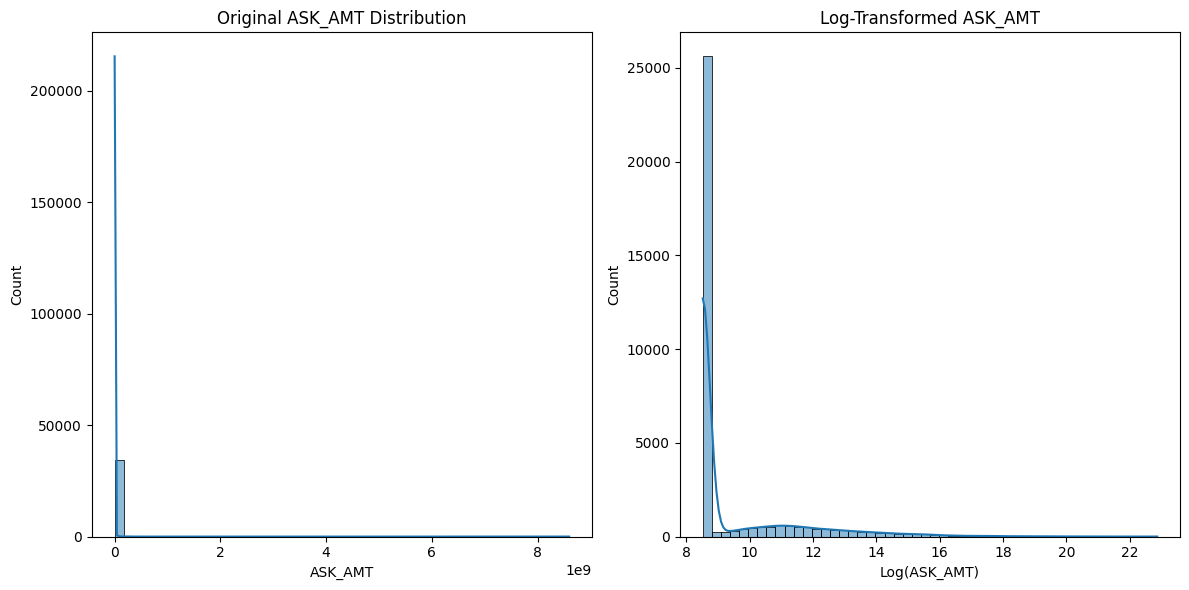

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(application_df["ASK_AMT"], bins=50, kde=True)
plt.title("Original ASK_AMT Distribution")
plt.xlabel("ASK_AMT")

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(application_df["ASK_AMT_LOG"], bins=50, kde=True)
plt.title("Log-Transformed ASK_AMT")
plt.xlabel("Log(ASK_AMT)")

plt.tight_layout()
plt.show()


In [164]:
import numpy as np

# Drop the original ASK_AMT column
application_df = application_df.drop(columns=["ASK_AMT"])

In [165]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Get the value counts of APPLICATION_TYPE
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()

# Choose a cutoff value (adjust as needed)
cutoff_value = 500

application_types_to_replace = app_type_counts[app_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(application_types_to_replace, "Other")


# Check to make sure replacement was successful
# application_df['APPLICATION_TYPE'].value_counts()
print(application_df["APPLICATION_TYPE"].value_counts())

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [166]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
print(application_df["CLASSIFICATION"].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C6100        1
C1820        1
C1900        1
C2150        1
Name: count, Length: 71, dtype: int64


In [167]:
# You may find it helpful to look at CLASSIFICATION value counts >1
print(application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() > 1])


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1256        2
C1246        2
C1234        2
C1267        2
Name: count, dtype: int64


In [168]:
# Get value counts of CLASSIFICATION
class_counts = application_df["CLASSIFICATION"].value_counts()

# Choose a cutoff value (adjust as needed)
cutoff_value = 1000  # Example: Replace all types with counts < 1000

# Step 3: Identify classifications to be replaced
classifications_to_replace = class_counts[class_counts < cutoff_value].index.tolist()

# Replace values in the DataFrame
application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(classifications_to_replace, "Other")

# Check the updated counts
print(application_df["CLASSIFICATION"].value_counts().to_string())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883


In [169]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# Get value counts of CLASSIFICATION
class_counts = application_df["CLASSIFICATION"].value_counts()

# Choose a cutoff value (adjust as needed)
cutoff_value = 1000  # Example: Replace all types with counts < 1000

# Identify classifications to be replaced
classifications_to_replace = class_counts[class_counts < cutoff_value].index.tolist()

# Replace values in the DataFrame
application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(classifications_to_replace, "Other")

# Check the updated counts
print(application_df["CLASSIFICATION"].value_counts().to_string())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883


In [170]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, drop_first=True)
print(application_df.head())  # To see the first few rows
print(application_df.shape)  # To check the number of new columns


   STATUS  IS_SUCCESSFUL  ASK_AMT_LOG  APPLICATION_TYPE_T10  \
0       1              1     8.517393                  True   
1       1              1    11.595344                 False   
2       1              0     8.517393                 False   
3       1              1     8.808817                 False   
4       1              1    11.867736                 False   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                 False                False                False   
1                 False                 True                False   
2                 False                False                False   
3                 False                 True                False   
4                 False                 True                False   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                False                False                False  ...   
1                False                False                F

In [171]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns=["IS_SUCCESSFUL"])
y = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [173]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=128, activation="relu", input_dim=X_train.shape[1]))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))

# Third hidden layer 
nn.add(tf.keras.layers.Dense(units=12, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\mnmat\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 12)             │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,785 (53.85 KB)

 Trainable params: 13,785 (53.85 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
# Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) ---Slowed Adam down
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [175]:
# Convert X_train and y_train to float32 (required by TensorFlow)
X_train = np.array(X_train).astype("float32")
X_test = np.array(X_test).astype("float32")
y_train = np.array(y_train).astype("int32")  # For classification, use int32
y_test = np.array(y_test).astype("int32")

In [176]:
# Testing to see the Linear Regression score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.717930029154519


In [177]:
# Train the model --- Tried 50 first
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
nn.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stop])


Epoch 1/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6474 - loss: 0.6389 - val_accuracy: 0.7147 - val_loss: 0.5749
Epoch 2/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7228 - loss: 0.5652 - val_accuracy: 0.7230 - val_loss: 0.5678
Epoch 3/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7278 - loss: 0.5569 - val_accuracy: 0.7268 - val_loss: 0.5631
Epoch 4/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7308 - loss: 0.5508 - val_accuracy: 0.7267 - val_loss: 0.5610
Epoch 5/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7271 - loss: 0.5524 - val_accuracy: 0.7257 - val_loss: 0.5610
Epoch 6/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7300 - loss: 0.5487 - val_accuracy: 0.7245 - val_loss: 0.5590
Epoch 7/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7339 - loss: 0.5482 - val_accuracy: 0.7278 - val_loss: 0.5595
Epoch 8/200
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7326 - loss: 0.5446 - val_accu

In [178]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 1ms/step - accuracy: 0.7268 - loss: 0.5552
Loss: 0.5552013516426086, Accuracy: 0.7268221378326416


In [179]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")